In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [6]:
data_path = "C:/Users/alhus/Downloads/archive (9)/Mall_Customers.csv"
data = pd.read_csv(data_path)

In [7]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Data Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values in numeric data:
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


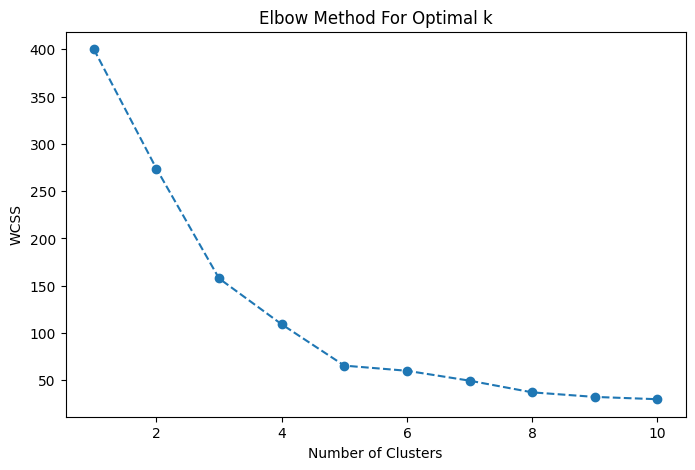

For n_clusters = 2, the silhouette score is 0.397
For n_clusters = 3, the silhouette score is 0.467
For n_clusters = 4, the silhouette score is 0.494
For n_clusters = 5, the silhouette score is 0.555
For n_clusters = 6, the silhouette score is 0.514
For n_clusters = 7, the silhouette score is 0.502
For n_clusters = 8, the silhouette score is 0.455
For n_clusters = 9, the silhouette score is 0.457
For n_clusters = 10, the silhouette score is 0.445

Data with Cluster Labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

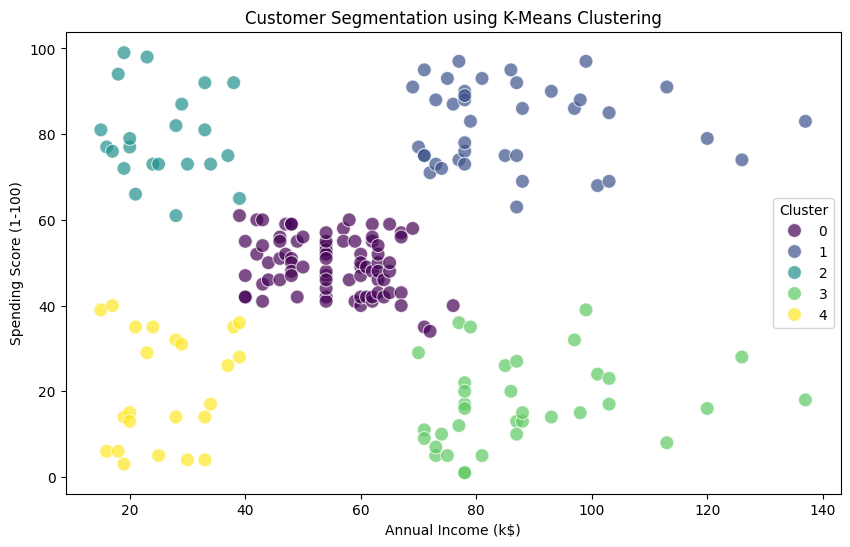


Cluster Centers (Original Scale):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [12]:
"""
Customer Segmentation Clustering Project

This script segments customers based on their annual income and spending score.
Business Questions Addressed:
1. Who are my customers?
2. What are the spending behaviors?
3. How should I tailor my marketing strategy?
4. Which customers are most profitable?
5. How can I improve product or service offerings?
6. How do customers behave differently?
7. What are the future growth opportunities?
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Uncomment to print the business questions
# def print_business_questions():
#     questions = [
#         "1. Who are my customers? - Which distinct segments exist within the customer base?",
#         "2. What are the spending behaviors? - What spending patterns do different customer segments exhibit?",
#         "3. How should I tailor my marketing strategy? - How can marketing messages and offers be customized for each segment?",
#         "4. Which customers are most profitable? - Which segments display high income and spending scores?",
#         "5. How can I improve product or service offerings? - What changes can be made to cater to the needs of each segment?",
#         "6. How do customers behave differently? - How do customer journeys vary across different segments?",
#         "7. What are the future growth opportunities? - Where are potential new markets or underrepresented segments?"
#     ]
#     print("Business Questions Addressed by the Project:")
#     for q in questions:
#         print(q)
#
# print_business_questions()

data = pd.read_csv("C:/Users/alhus/Downloads/archive (9)/Mall_Customers.csv")
print("Data Head:")
print(data.head())

data_numeric = data[['Annual Income (k$)', 'Spending Score (1-100)']]
print("\nMissing values in numeric data:")
print(data_numeric.isnull().sum())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg:.3f}")

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

print("\nData with Cluster Labels:")
print(data.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=data,
    s=100,
    alpha=0.7
)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print("\nCluster Centers (Original Scale):")
print(centers_df)



Customer Segmentation Clustering Project

Customer segmentation using the Mall Customers dataset.
It uses K-means clustering from scikit-learn to segment customers based on their
'Annual Income (k$)' and 'Spending Score (1-100)'.

Business Questions Addressed by This Project:
1. Who are my customers?
   - Which distinct segments exist within the customer base?
2. What are the spending behaviors?
   - What spending patterns do different customer segments exhibit?
3. How should I tailor my marketing strategy?
   - How can marketing messages and offers be customized for each segment?
4. Which customers are most profitable?
   - Which segments display high income and spending scores?
5. How can I improve product or service offerings?
   - What changes can be made to cater to the needs of each segment?
6. How do customers behave differently?
   - How do customer journeys vary across different segments?
7. What are the future growth opportunities?
   - Where are potential new markets or underrepresented segments?